本次作业将从Anomaly Detection Meta-Analysis Benchmarks提供的benchmark数据集中任选两个进行分析，选择的数据为wine_benchbarks和shuttle_benchbarks，在两个两个数据集中进行离群点分析和异常检测。

In [2]:
#加载本次实验所用函数
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载pydod中要用的5种算法
from pyod.models.cof import COF
from pyod.models.knn import KNN 
from pyod.models.mcd import MCD
from pyod.models.lof import LOF
from pyod.models.iforest import IForest

# 对wine_benchbarks数据集的分析

In [20]:
#数据预处理
from os import walk
df = []
df_noise = []

for i,_,j in walk("C:/Users/wangjiajia/Desktop/final/wine/benchmarks"):#读取benchmarks中的数据
    for f in j:
        tp = pd.read_csv(i + '/' + f )
        if(tp.shape[1] == 17):
            df.append(tp)
        elif(tp.shape[1] == 50):
            df_noise.append(tp)

dfALL_wine = pd.concat(df)#将benchmarks中的数据分为原始数据和噪音数据
dfALL_noise_wine = pd.concat(df_noise)

print(dfALL_wine.columns)
print(dfALL_noise_wine.columns)

Index(['point.id', 'motherset', 'origin', 'original.label', 'diff.score',
       'ground.truth', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['point.id', 'motherset', 'origin', 'original.label', 'diff.score',
       'ground.truth', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'noise..1', 'noise..2', 'noise..3', 'noise..4', 'noise..5', 'noise..6',
       'noise..7', 'noise..8', 'noise..9', 'noise..10', 'noise..11',
       'noise..12', 'noise..13', 'noise..14', 'noise..15', 'noise..16',
       'noise..17', 'noise..18', 'noise..19', 'noise..20', 'noise..21',
       'noise..22', 'noise..23', 'noise..24', 'noise..25', 'noise..26',
       'noise..27', 'noise..28', 'noise..29', 'no

In [22]:
#对数据集上所有数据进行检测时使用数据包中提供的original数据集并对数据维度进行降维，为了方便后续的可视化展示。
fin_data = pd.read_csv('C:/Users/wangjiajia/Desktop/final/wine/meta_data/wine.original.csv')
fin_origin = fin_data[['quality','fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol']]
print(fin_origin.shape)

pca=PCA(n_components=2)     
tp = pca.fit_transform(fin_origin)#对样本进行降维
df_fin = pd.DataFrame(tp)
df_fin.columns = ['0','1']
print(df_fin.shape)

(6497, 12)
(6497, 2)


In [27]:
origin_all = dfALL_wine[['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol']]
print(origin_all.shape)
new_origin_all = origin_all.drop_duplicates(subset=['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol'
], keep='first')
print(new_origin_all.shape)

origin_noise_all = dfALL_noise_wine[['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol']]
print(origin_noise_all.shape)
new_origin_noise_all = origin_noise_all.drop_duplicates(subset=['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol'
], keep='first')
print(new_origin_noise_all.shape)

(1049492, 11)
(5318, 11)
(1044743, 11)
(5318, 11)


In [28]:
#提取数据集中的数值属性，作为模型的训练数据。
pca=PCA(n_components=2)     #加载PCA算法，设置降维后主成分数目为2
X_train = pca.fit_transform(new_origin_all)#对样本进行降维
df = pd.DataFrame(X_train)
df.columns = ['0','1']

pos = (int(len(df)/10))*9 #对数据集进行9/1划分

In [ ]:
tmp = pd.read_csv("wine.original.csv")#加载此次分析的数据为wine.original.csv
#将benchmark中的数据分为原数据和noise，去重后根据需要使用数据集对模型进行训练。
#定义区分离群点和异常点的画图函数
def show_scatter(clf_name, df, y_train_pred, pos):
    plt.figure(clf_name+' (Blue:Inliers Red: Outliers)')
    plt.figure(figsize=(10,8))
    plt.scatter(np.array(df)[:,0],np.array(df)[:,1],s = 10,c='b',alpha = 0.1)
    outliers = []
    for i in range(pos):
        if(y_train_pred[i]==1):
            outliers.append([df.iloc[i,0],df.iloc[i,1]])
    outliers = pd.DataFrame(outliers)  
    plt.scatter(outliers[0], outliers[1],s = 30,c='r',alpha = 0.2)
    plt.title(clf_name+' (Blue:Inliers Red: Outliers)')

选取部分pyOD算法库中的算法，选定训练集，对数据集上的异常点进行检测并输出可视化图像。 本次选择的算法是KNN,COF,LOF,IForest和MCD。 根据得到的分类标签，对降维后的数据进行标记并在图像中进行展示。

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


<Figure size 432x288 with 0 Axes>

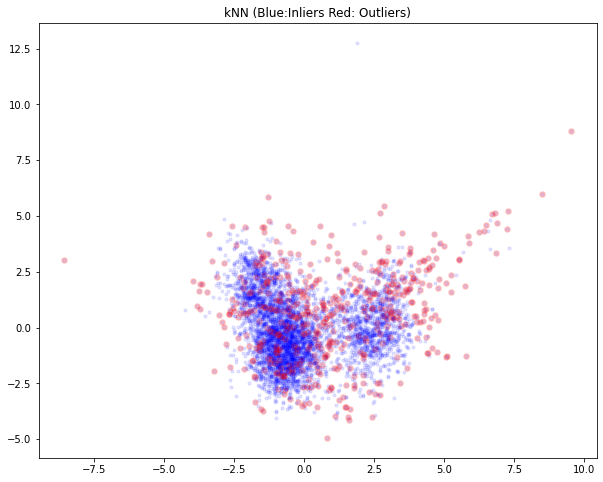

In [29]:
#选定训练集，选取部分pyOD算法库中的算法，对数据集上的异常点进行检测并输出可视化图像。 选定的算法是KNN,COF,LOF,IForest和MCD。 根据得到的分类标签，对降维后的数据进行标记并在图像中进行展示。
clf_name = 'kNN'
clf = KNN() # 初始化检测器
clf.fit(new_origin_all[:pos]) # 使用训练集训练检测器clf

# 返回训练数据X_train上的异常标签和异常分值
y_train_pred = clf.labels_ # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_scores = clf.decision_scores_ # 返回训练数据上的异常值 (分值越大越异常)

# 用训练好的clf来预测未知数据中的异常值
y_test_pred = clf.predict(new_origin_all[pos:]) # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值) 
y_test_scores = clf.decision_function(new_origin_all[pos:]) # 返回未知数据上的异常值

show_scatter(clf_name, df, y_train_pred, pos)

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


<Figure size 432x288 with 0 Axes>

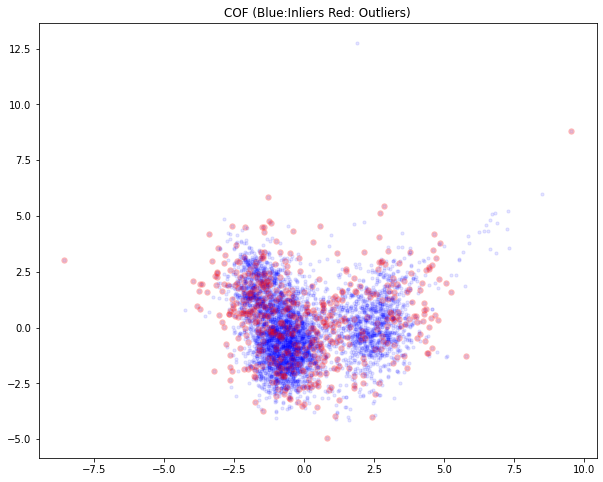

In [30]:
clf_name = 'COF'
clf = COF(n_neighbors=30)
clf.fit(new_origin_all[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(new_origin_all[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(new_origin_all[pos:])  # outlier scores

show_scatter(clf_name, df, y_train_pred, pos)

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


<Figure size 432x288 with 0 Axes>

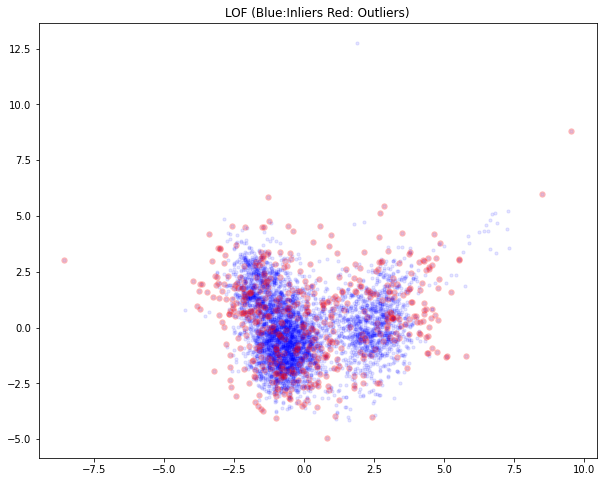

In [31]:
# train LOF detector
clf_name = 'LOF'
clf = LOF()
clf.fit(new_origin_all[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(new_origin_all[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(new_origin_all[pos:])  # outlier scores

show_scatter(clf_name, df, y_train_pred, pos)

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


<Figure size 432x288 with 0 Axes>

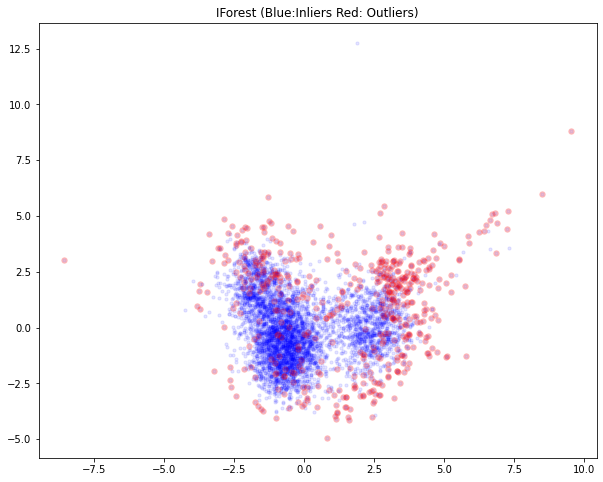

In [32]:
clf_name = 'IForest'
clf = IForest()
clf.fit(new_origin_all[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores
# get the prediction on the test data
y_test_pred = clf.predict(new_origin_all[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(new_origin_all[pos:])  # outlier scores

show_scatter(clf_name, df, y_train_pred, pos)

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


<Figure size 432x288 with 0 Axes>

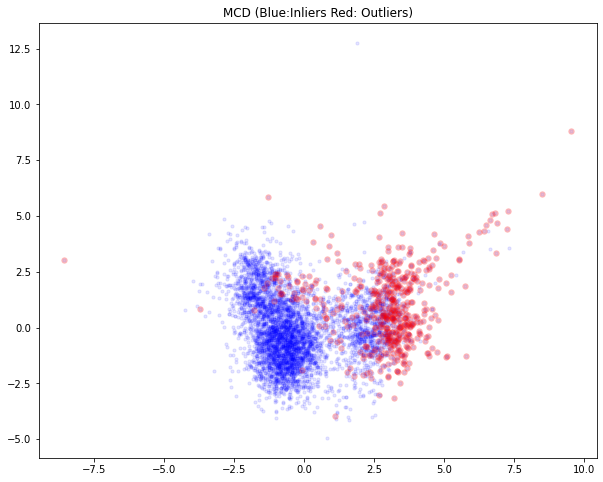

In [33]:
# train MCD detector
clf_name = 'MCD'
clf = MCD()
clf.fit(new_origin_all[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(new_origin_all[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(new_origin_all[pos:])  # outlier scores

show_scatter(clf_name, df, y_train_pred, pos)

             0          1  label
0    56.718322   1.805959      0
1    11.848680 -19.902059      0
2   -18.288538   3.849399      0
3    72.225970  -0.176139      0
4    72.225970  -0.176139      0
5   -18.288538   3.849399      0
6    19.646735  -5.164376      0
7    56.718322   1.805959      0
8    11.848680 -19.902059      0
9    12.133527  -5.598450      0
10  -55.954628  -6.868276      0
11   -9.730464 -11.634675      0
12  -43.138538  -4.788726      0
13   30.356236  10.635928      0
14   57.667054  -2.587980      0
15   -4.384962  -1.646276      0
16  -16.566401   3.286687      0
17  -40.142629   7.897273      0
18   50.416239 -26.018789      1
19   17.671482  -0.581406      0
20  -40.142629   7.897273      0
21  -16.119847  -8.060128      0
22    8.343877   8.693074      0
23   49.369480 -17.552427      0
24   22.014060 -20.276451      0
25  131.677275  -5.062967      1
26   30.267356  -2.729424      0
27   25.027418  -4.346025      0
28   12.500193 -16.993462      0
29   -0.35

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

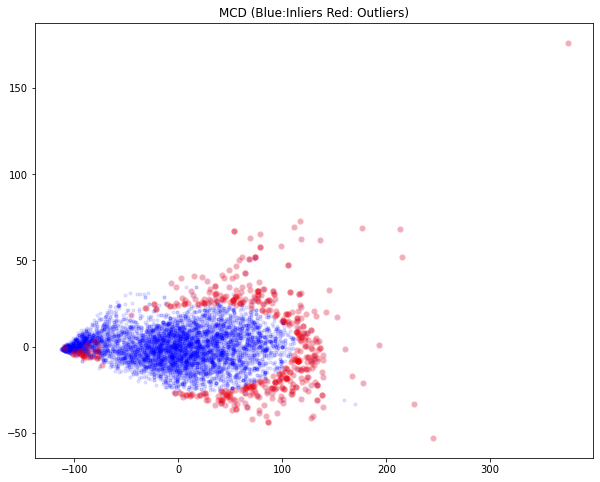

In [34]:
# train MCD detector
clf_name = 'MCD'
clf = MCD()
clf.fit(df_fin[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(df_fin[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(df_fin[pos:])  # outlier scores

train = df_fin[:pos]
train['label'] = y_train_pred
print(train[:50])

show_scatter(clf_name, df_fin, y_train_pred, pos)

结论：
可以看出KNN,COF,LOF,IForest和MCD五种算法对离群点和异常点的预测是不尽相同的，彼此间的预测存在差别，其中MCD算法的预测结果与另外4种算法相差较大
这给我们的提示是我们根据不同的数据集正确选择离群点分析和异常检测算法，用不同的指标来筛选出最合适的算法。
下面我们用同样的算法对shuttle_benchbarks数据集进行分析

# 对shuttle_benchbarks数据集的分析

In [35]:
dp = pd.read_csv("shuttle.original.csv")

In [4]:
from os import walk
df1 = []
df_noise1 = []

for i,_,j in walk("C:/Users/wangjiajia/Desktop/final/shuttle/benchmarks"):
    for f in j:
        tp = pd.read_csv(i + '/' + f )
        if(tp.shape[1] == 15):
            df1.append(tp)
        elif(tp.shape[1] == 42):
            df_noise1.append(tp)

dfALL_shuttle = pd.concat(df1)
dfALL_noise_shuttle = pd.concat(df_noise1)

print(dfALL_shuttle.columns)
print(dfALL_noise_shuttle.columns)

Index(['point.id', 'motherset', 'origin', 'original.label', 'diff.score',
       'ground.truth', 'V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5', 'V.6', 'V.7',
       'V.8'],
      dtype='object')
Index(['point.id', 'motherset', 'origin', 'original.label', 'diff.score',
       'ground.truth', 'V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5', 'V.6', 'V.7',
       'V.8', 'noise..1', 'noise..2', 'noise..3', 'noise..4', 'noise..5',
       'noise..6', 'noise..7', 'noise..8', 'noise..9', 'noise..10',
       'noise..11', 'noise..12', 'noise..13', 'noise..14', 'noise..15',
       'noise..16', 'noise..17', 'noise..18', 'noise..19', 'noise..20',
       'noise..21', 'noise..22', 'noise..23', 'noise..24', 'noise..25',
       'noise..26', 'noise..27'],
      dtype='object')


In [5]:
fin_data = pd.read_csv('C:/Users/wangjiajia/Desktop/final/shuttle/meta_data/shuttle.original.csv')
fin_origin = fin_data[[ 'V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5', 'V.6', 'V.7', 'V.8']]
print(fin_origin.shape)

pca=PCA(n_components=2)     #加载PCA算法，设置降维后主成分数目为2
tp = pca.fit_transform(fin_origin)#对样本进行降维
df_fin = pd.DataFrame(tp)
df_fin.columns = ['0','1']
print(df_fin.shape)

(58000, 9)
(58000, 2)


In [7]:
origin_all = dfALL_shuttle[['V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5', 'V.6', 'V.7', 'V.8']]
print(origin_all.shape)
new_origin_all = origin_all.drop_duplicates(subset=['V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5', 'V.6', 'V.7', 'V.8'], keep='first')
print(new_origin_all.shape)

origin_noise_all = dfALL_noise_shuttle[['V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5', 'V.6', 'V.7', 'V.8']]
print(origin_noise_all.shape)
new_origin_noise_all = origin_noise_all.drop_duplicates(subset=['V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5', 'V.6', 'V.7', 'V.8'], keep='first')
print(new_origin_noise_all.shape)

(1350000, 9)
(58000, 9)
(1350000, 9)
(58000, 9)


In [8]:
pca=PCA(n_components=2)     #加载PCA算法，设置降维后主成分数目为2
X_train = pca.fit_transform(new_origin_all)#对样本进行降维
df = pd.DataFrame(X_train)
df.columns = ['0','1']

pos = (int(len(df)/10))*9 #对数据集进行9/1划分

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


<Figure size 432x288 with 0 Axes>

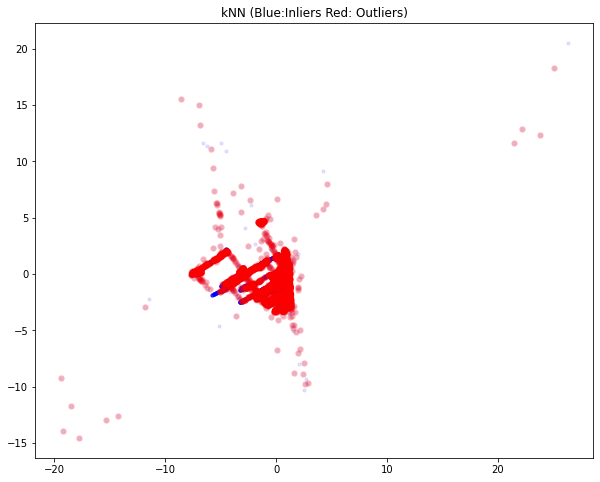

In [11]:
# 训练一个kNN检测器
clf_name = 'kNN'
clf = KNN() # 初始化检测器
clf.fit(new_origin_all[:pos]) # 使用训练集训练检测器clf

# 返回训练数据X_train上的异常标签和异常分值
y_train_pred = clf.labels_ # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_scores = clf.decision_scores_ # 返回训练数据上的异常值 (分值越大越异常)

# 用训练好的clf来预测未知数据中的异常值
y_test_pred = clf.predict(new_origin_all[pos:]) # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值) 
y_test_scores = clf.decision_function(new_origin_all[pos:]) # 返回未知数据上的异常值

show_scatter(clf_name, df, y_train_pred, pos)

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


<Figure size 432x288 with 0 Axes>

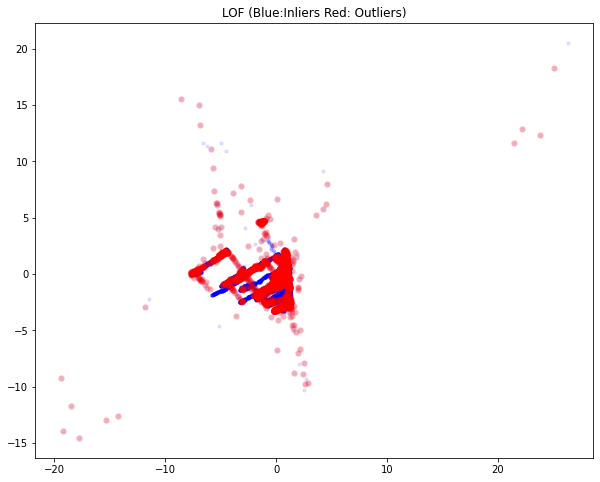

In [13]:
# train LOF detector
clf_name = 'LOF'
clf = LOF()
clf.fit(new_origin_all[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(new_origin_all[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(new_origin_all[pos:])  # outlier scores

show_scatter(clf_name, df, y_train_pred, pos)

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


<Figure size 432x288 with 0 Axes>

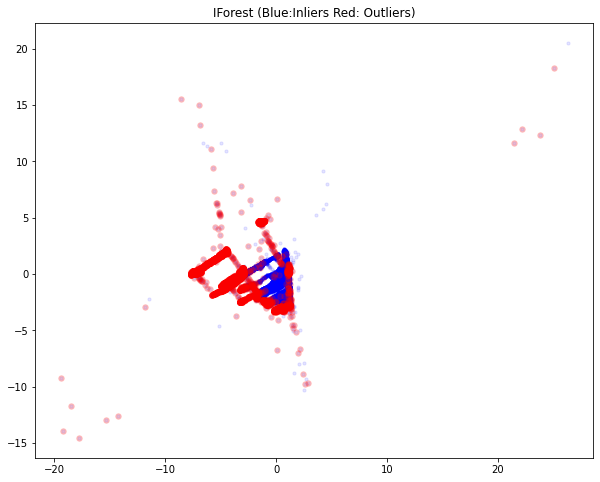

In [14]:
clf_name = 'IForest'
clf = IForest()
clf.fit(new_origin_all[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores
# get the prediction on the test data
y_test_pred = clf.predict(new_origin_all[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(new_origin_all[pos:])  # outlier scores

show_scatter(clf_name, df, y_train_pred, pos)

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-47.933321050009397 > -74.072699125012690). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-47.877869231254792 > -73.125104103417357). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-47.440574859952363 > -112.988305147773147). You

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.626476613251761 > -75.058115574407125). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-47.424629663069936 > -112.985826978089563). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-46.776710843094492 > -112.866569368687038). Yo

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-47.403097797925618 > -112.970115037568263). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.290140901950281 > -74.948158663960029). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.306109636244187 > -76.061541868915242). You

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-46.925035579424460 > -112.879589486533760). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.426058220442769 > -76.204617225288544). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.693410422847464 > -74.995182242911795). You

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.504015711355905 > -76.190806499890158). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.409986629268218 > -75.295611702356680). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.544240834403048 > -76.346588021695410). You 

<Figure size 432x288 with 0 Axes>

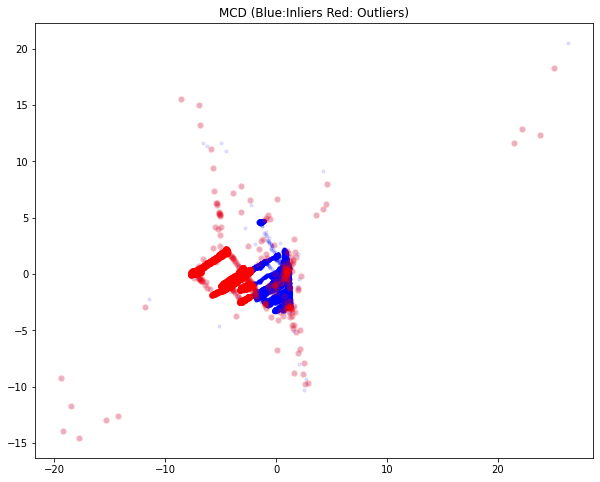

In [15]:
# train MCD detector
clf_name = 'MCD'
clf = MCD()
clf.fit(new_origin_all[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(new_origin_all[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(new_origin_all[pos:])  # outlier scores

show_scatter(clf_name, df, y_train_pred, pos)

使用MCD算法做预测时，对前50个原始数据的检测结果，并输出MCD检测在原始数据训练集上的结果。

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


            0           1  label
0    1.730393   21.276971      1
1  -23.314576    0.778697      0
2    6.155926   -0.032244      0
3  -16.407773   -0.208418      0
4   27.456003   -0.364980      0
5    1.817743    1.832094      0
6   -8.277616    1.001765      0
7    5.267351   -1.140831      0
8    1.743507    8.391861      1
9    1.886073   -0.501524      0
10   2.055490    0.008751      0
11 -18.742595   -0.234839      0
12  -5.662836    1.676657      0
13  -2.547685    0.274121      0
14   9.554691   -0.503700      0
15  17.445497   -0.379141      0
16   5.293245   -0.224281      0
17   6.228056   -0.080135      0
18  -2.815137    2.854905      0
19   5.496292 -318.602093      1
20  -0.761230    2.805064      0
21   1.386069    3.371152      0
22   1.586525   -5.218442      1
23 -17.655770   -0.359419      0
24   5.345830   -1.303522      0
25   2.470868    4.246494      1
26  -6.682518   -1.124858      0
27   1.049733   -0.059640      0
28   1.133371    2.954255      0
29   2.625

<Figure size 432x288 with 0 Axes>

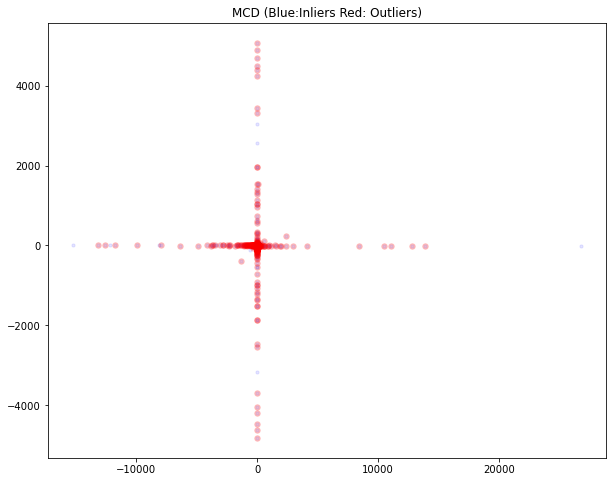

In [16]:
# train MCD detector
clf_name = 'MCD'
clf = MCD()
clf.fit(df_fin[:pos])

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(df_fin[pos:])  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(df_fin[pos:])  # outlier scores

train = df_fin[:pos]
train['label'] = y_train_pred
print(train[:50])

show_scatter(clf_name, df_fin, y_train_pred, pos)